## Roller Coaster data set 
- Data set from Kaggle : https://www.kaggle.com/datasets/robikscube/rollercoaster-database
- 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\hp\conda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("coaster_db.csv")

In [5]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [6]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [7]:
df.shape

(1087, 56)

In [12]:
df = df[['coaster_name',
    'Location', 'Status',
    'Manufacturer',
       'year_introduced',
        'latitude', 'longitude',
    'Type_Main',
       'opening_date_clean',
       'speed_mph',
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [14]:
df.shape

(1087, 13)

In [15]:
df.isna().sum()

coaster_name            0
Location                0
Status                213
Manufacturer           59
year_introduced         0
latitude              275
longitude             275
Type_Main               0
opening_date_clean    250
speed_mph             150
height_ft             916
Inversions_clean        0
Gforce_clean          725
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

In [16]:
df.loc[df.duplicated()]

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean


In [17]:
df.loc[df.duplicated(subset=['coaster_name'])]

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaN,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaN,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7


In [ ]:
# duplicates exists 

# checking example of duplicates

df.query('coaster_name == "Crystal Beach Cyclone"')

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [19]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [26]:
df = df.loc[~df.duplicated(subset=['coaster_name','Location','opening_date_clean'])].reset_index(drop = True)

In [27]:
df

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


In [28]:
df.shape

(990, 13)

In [ ]:
# understanding Features 
# Uni variate analysis 
# Histogram - KDE - BoxPlot 

df['year_introduced'].value_counts()

year_introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'count')

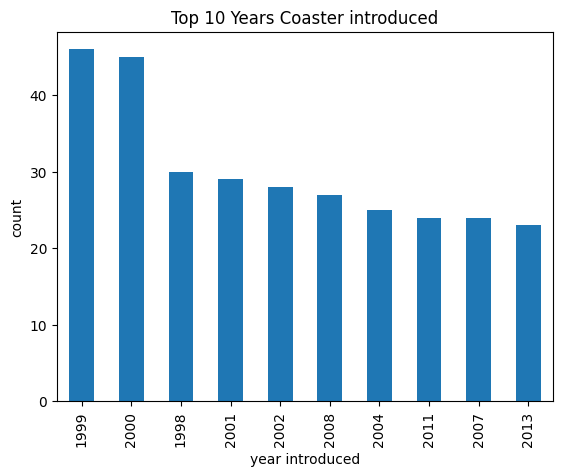

In [34]:
ax = df['year_introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years Coaster introduced')
ax.set_xlabel('year introduced')
ax.set_ylabel('count')

In [ ]:
df['speed_mph'].value_counts()

speed_mph
50.0    54
55.0    38
40.0    36
45.0    31
49.7    28
        ..
16.2     1
57.8     1
53.4     1
17.0     1
49.0     1
Name: count, Length: 176, dtype: int64

Text(0.5, 0, 'speed mph')

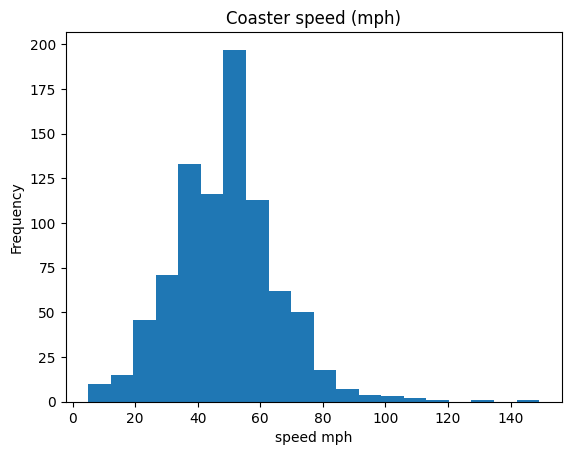

In [ ]:
ax = df['speed_mph'].plot(kind="hist", bins=20, title="Coaster speed (mph)")
ax.set_xlabel("speed mph")

Text(0.5, 0, 'speed mph')

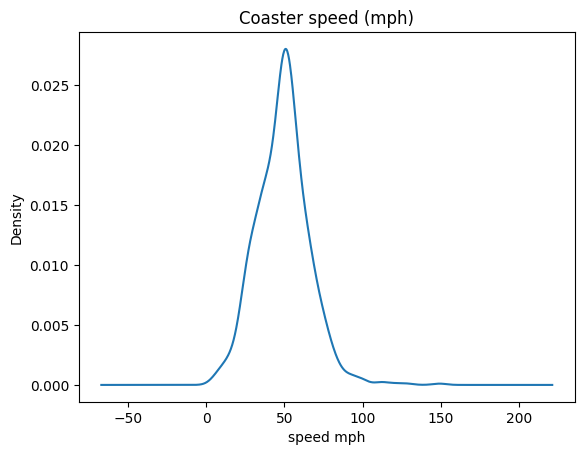

In [39]:
ax = df['speed_mph'].plot(kind="kde",  title="Coaster speed (mph)")
ax.set_xlabel("speed mph")

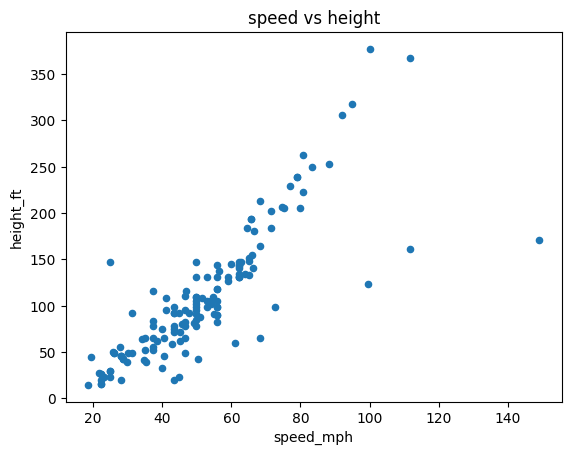

In [41]:
# Features relationships 

# Scatter plots 

df.plot(kind='scatter', x='speed_mph', y="height_ft", title='speed vs height')
plt.show()

<Axes: xlabel='speed_mph', ylabel='height_ft'>

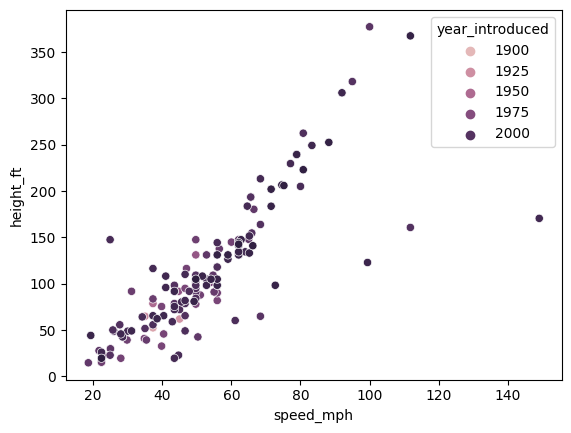

In [43]:
sns.scatterplot(x='speed_mph',y='height_ft',data=df, hue='year_introduced')

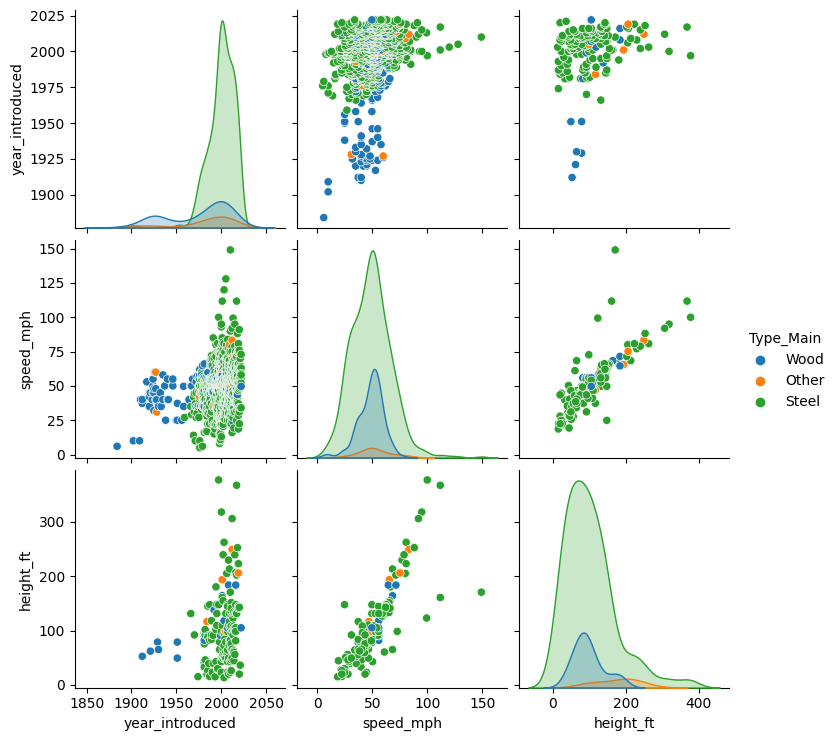

In [47]:
sns.pairplot(data=df, vars=['year_introduced',
       'speed_mph',
       'height_ft'], hue='Type_Main')

plt.show()

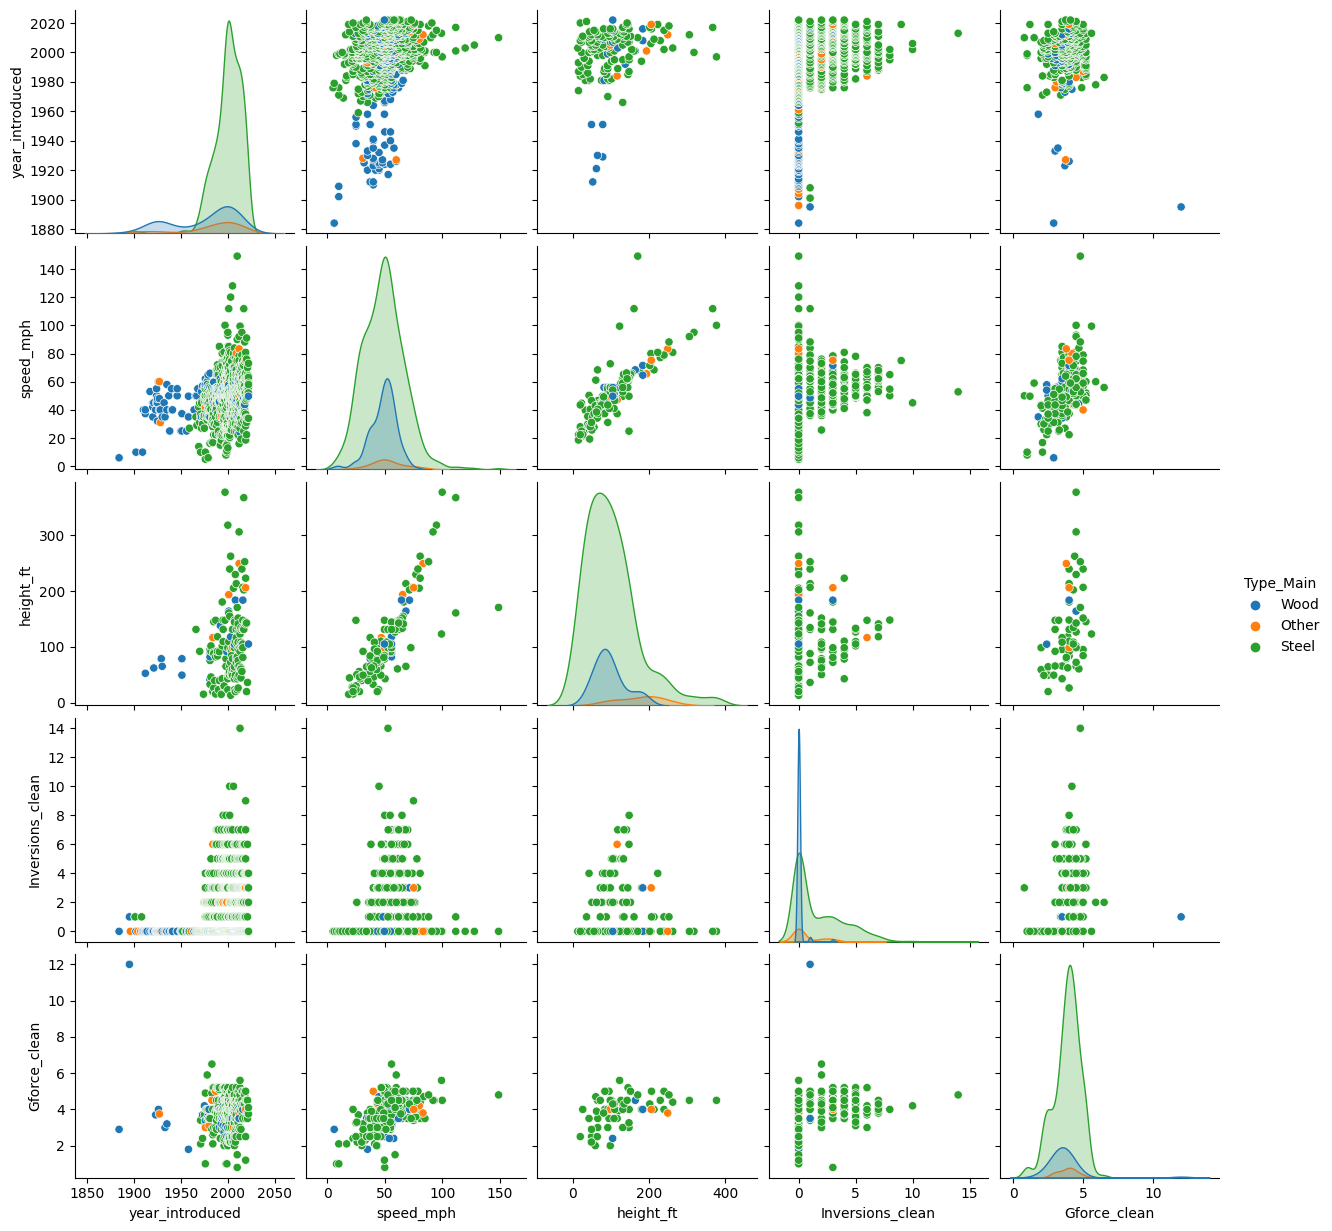

In [50]:
sns.pairplot(df,
             vars=['year_introduced','speed_mph',
                   'height_ft','Inversions_clean','Gforce_clean'],
            hue='Type_Main')
plt.show()

In [51]:
df_corr = df[['year_introduced','speed_mph',\
              'height_ft','Inversions_clean','Gforce_clean']].dropna().corr()
df_corr

,year_introduced,speed_mph,height_ft,Inversions_clean,Gforce_clean
year_introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions_clean,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce_clean,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

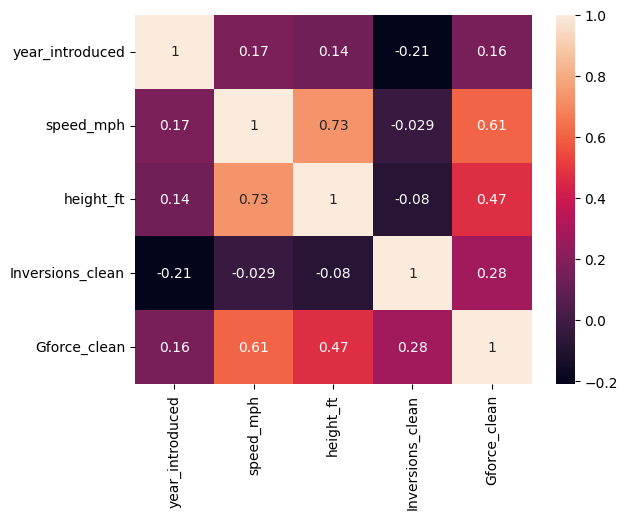

In [53]:
# speed and height +ve corr
# 

sns.heatmap(df_corr, annot=True)

In [54]:
# Ask Questions about Data

In [57]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [60]:
# q. what are locations with faster rollercoasters 

df['Location'].value_counts()

Location
Other                            181
Kings Island                      19
Cedar Point                       18
Six Flags Magic Mountain          17
Hersheypark                       16
                                ... 
Granada Studios Tour               1
Funtown Splashtown USA             1
Tolchester Beach Park              1
Suzuka, Mie Prefecture, Japan      1
Epcot                              1
Name: count, Length: 280, dtype: int64

In [63]:
df.query('Location != "Other"') \
    .groupby('Location')['speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10')\
    .sort_values('mean')

,mean,count
Location,,
Alton Towers,42.791667,12
Carowinds,43.571429,14
Kings Island,49.273684,19
Hersheypark,50.576923,13
Kings Dominion,52.083333,12
Six Flags Great Adventure,53.036364,11
Canada's Wonderland,53.533333,12
Six Flags Magic Mountain,57.241176,17
Cedar Point,57.833333,18


<Axes: ylabel='Location'>

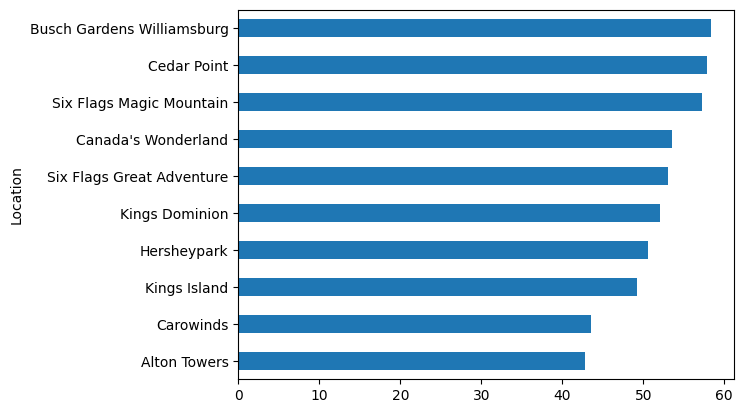

In [65]:
df.query('Location != "Other"') \
    .groupby('Location')['speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10')\
    .sort_values('mean')['mean']\
    .plot(kind='barh')